D:\2nd Semester\python\ana\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
D:\2nd Semester\python\ana\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


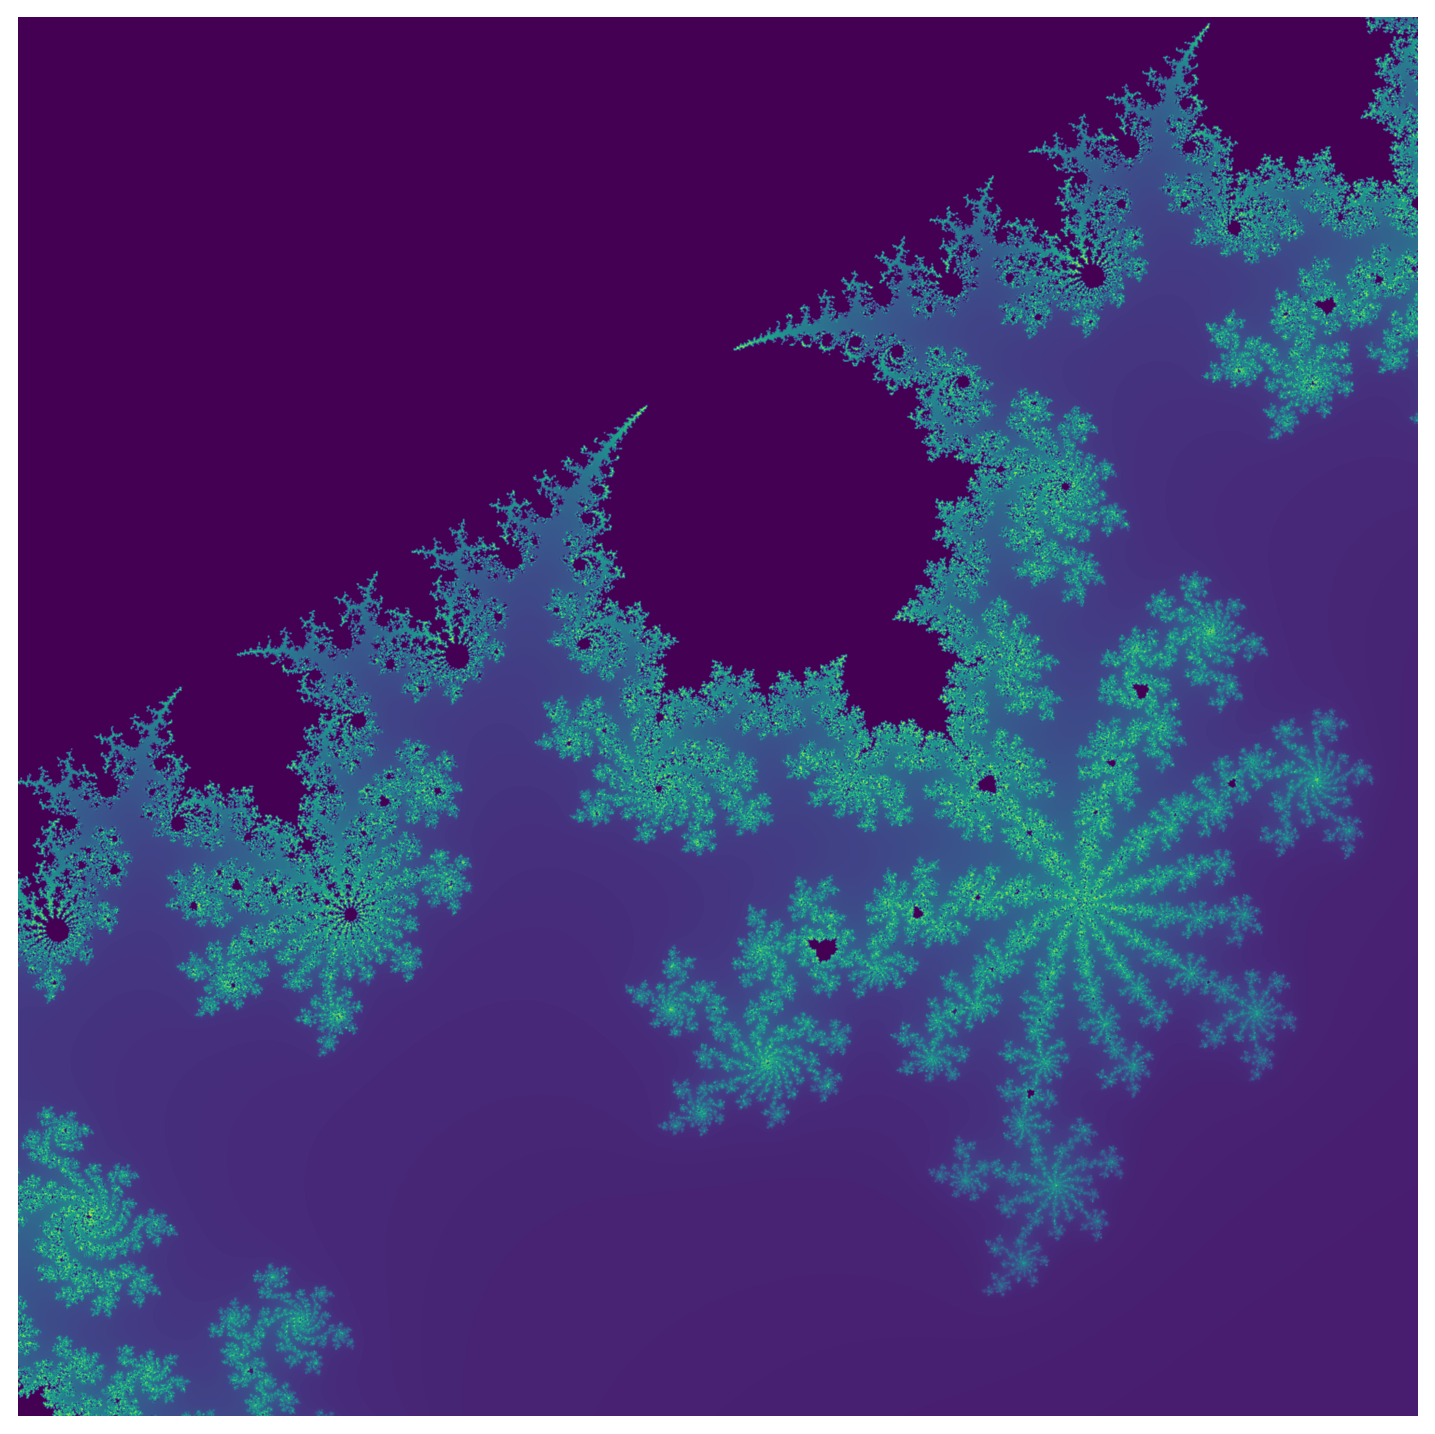

In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

"""
===================================
Shaded & power normalized rendering
===================================

The Mandelbrot set rendering can be improved by using a normalized recount
associated with a power normalized colormap (gamma=0.3). Rendering can be
further enhanced thanks to shading.

The `maxiter` gives the precision of the computation. `maxiter=200` should
take a few seconds on most modern laptops.
"""

def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn, dtype=np.float32)
    Y = np.linspace(ymin, ymax, yn, dtype=np.float32)
    C = X + Y[:,None]*1j                               # This is a way to creat column vector and to creat matrix like C here 
    N = np.zeros(C.shape, dtype=int)                   # Remember to use dtype, it's useful
    Z = np.zeros(C.shape, np.complex64)
    for n in range(maxiter):                           # get all N[I] with iteration fewer than maxiter
        I = np.less(abs(Z), horizon)
        N[I] = n
        Z[I] = Z[I]**2 + C[I]                          # Z[I] is the iterated elemnet that we care about()
    N[N == maxiter-1] = 0
    return Z, N


if __name__ == '__main__':
    import time
    import matplotlib
    from matplotlib import colors
    import matplotlib.pyplot as plt

    #xmin, xmax, xn = -2.25, +0.75, 3000/2
    #ymin, ymax, yn = -1.25, +1.25, 2500/2
    
    xmin, xmax, xn = 0.14, 0.2, 3000/2
    ymin, ymax, yn = 0.55, 0.61, 3000/2
    
    maxiter = 200
    horizon = 2.0 ** 40
    log_horizon = np.log(np.log(horizon))/np.log(2)
    Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

    # Normalized recount as explained in:
    # https://linas.org/art-gallery/escape/smooth.html
    # https://www.ibm.com/developerworks/community/blogs/jfp/entry/My_Christmas_Gift

    # This line will generate warnings for null values but it is faster to
    # process them afterwards using the nan_to_num
    with np.errstate(invalid='ignore'):
        M = np.nan_to_num(N + 1 -
                          np.log(np.log(abs(Z)))/np.log(2) +
                          log_horizon)

    dpi = 140
    width = 10
    height = 10*yn/xn
    fig = plt.figure(figsize=(width, height), dpi=dpi)
    ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

    # Shaded rendering
    #light = colors.LightSource(azdeg=315, altdeg=10)
    #M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
    #                norm=colors.PowerNorm(0.3), blend_mode='hsv')
    
    
    cmap = plt.cm.gray
    
    
    plt.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
    ax.set_xticks([])
    ax.set_yticks([])

    # Some advertisement for matplotlib
    #year = time.strftime("%Y")
    #major, minor, micro = matplotlib.__version__.split('.', 2)
    #text = ("The Mandelbrot fractal set\n"
    #        "Rendered with matplotlib %s.%s, %s - http://matplotlib.org"
    #        % (major, minor, year))
    #ax.text(xmin+.025, ymin+.025, text, color="white", fontsize=12, alpha=0.5)

    plt.show()

In [8]:
np.less([1,2,3],2)

array([ True, False, False], dtype=bool)